In [30]:
# Set up.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

np.random.seed(42)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


As annotated in the README, determining course and speed of ships using bearings only simply isn't possible. This is already pretty well documented, but even trying to apply machine learning algorithms results in way too many ambiguous solutions.

I will have to make some of the images myself. I'm going to make a list of colors that I'll need.

I found a diagram of light orientations that I'm going to use.

In [2]:
targets = np.array(['Power-driven vessel underway (>50m in length) (starboard)',
                    'Power-driven vessel underway (>50m in length) (port)',
                    'Power-driven vessel underway (>50m in length) (stern)',
                    'Power-driven vessel underway (>50m in length) (bow)',
                    'Power-driven vessel underway (<50m in length) (starboard)',
                    'Power-driven vessel underway (<50m in length) (port)',
                    'Power-driven vessel underway (<50m in length) (stern)',
                    'Power-driven vessel underway (<50m in length) (bow)',
                    'Power-driven vessel underway (<12m in length) (starboard)',
                    'Power-driven vessel underway (<12m in length) (port)',
                    'Power-driven vessel underway (<12m in length) (stern)',
                    'Power-driven vessel underway (<12m in length) (bow)',
                    'Power-driven vessel underway (<7m in length) (starboard)',
                    'Power-driven vessel underway (<7m in length) (port)',
                    'Power-driven vessel underway (<7m in length) (stern)',
                    'Power-driven vessel underway (<7m in length) (bow)'], dtype=np.dtype('unicode_'))

In [3]:
colors = np.array([[(255, 0, 0), (255, 255, 255), (0, 255, 0)],
                [(0, 0, 0), (255, 255, 0), (0, 0, 0)]], dtype=np.uint8)

In [4]:
black = [[(0, 0, 0) for _ in range(255)] for _ in range(255)]

In [5]:
black_array = np.array(black, dtype=np.uint8)

In [6]:
black_array[100:110, 100:110] = (255, 255, 255)

In [7]:
black_array.shape

(255, 255, 3)

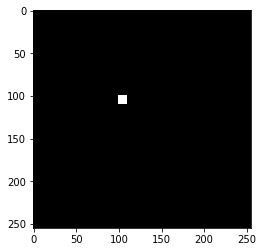

In [8]:
plt.imshow(black_array)
plt.show();

In [9]:
test_black = np.zeros((255, 255, 3))

In [10]:
raveled = np.ravel(test_black)

In [11]:
raveled.reshape(255, 255, 3)
reshaped = raveled.reshape(255, 255, 3)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,

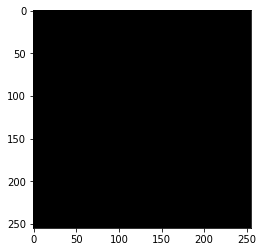

In [13]:
plt.imshow(test_black)
plt.show();

In [14]:
def stern_light_array_generator():
    """
    Makes a numpy array of a lot of different arrays meant to behave as an image of a stern light. 
    The color of stern lights is white, so this is fairly straight forward with a bunch of zeros.
    """
    min_pixel_bound = 50
    max_pixel_bound = 200
    total_gens = np.random.randint(500, 701)
    all_stern_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        light_width = np.random.randint(10, 51)
        start_x = np.random.randint(min_pixel_bound, max_pixel_bound)
        start_y = np.random.randint(min_pixel_bound, max_pixel_bound)
        new_array = np.zeros((255, 255, 3))
        aggregate_horiz = start_x + light_width
        aggregate_vert = start_y + light_width
        new_array[start_x:aggregate_horiz, start_y:aggregate_vert] = (255, 255, 255)
        # import pdb; pdb.set_trace()
        new_array = new_array.flatten()
        all_stern_images[i] = new_array

    return all_stern_images


In [15]:
stern_images = stern_light_array_generator()

In [16]:
len(stern_images[402])

195075

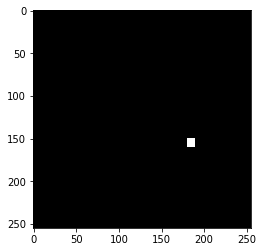

In [29]:
plt.imshow(stern_images[33].reshape(255, 255, 3))
plt.show();

In [47]:
def broad_greater_than_50_meters_starboard():
    """
    Return a numpy array of randomly generated images of a 
    power driven vessel that has two masthead lights and one running light
    visible.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    green = (0, 255, 0)
    total_gens = np.random.randint(500, 701)
    all_broad_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_array = np.zeros((255, 255, 3))
        taller_masthead_light = np.random.randint(50, 126)
        shorter_masthead_light = np.random.randint(130, 186)
        distance_bw_left_endpoint = np.random.randint(20, 126)
        distance_bw_right_endpoint = np.random.randint(125, 211)
        running_light_diff = np.random.randint(10, 31)
        light_width = np.random.randint(10, 21)
        tall_masthead_height = taller_masthead_light + light_width
        tall_masthead_width = distance_bw_left_endpoint + light_width
        short_masthead_height = shorter_masthead_light + light_width
        short_masthead_width = distance_bw_right_endpoint + light_width
        running_light_start = shorter_masthead_light + running_light_diff
        running_light_width = running_light_start + light_width
        if distance_bw_right_endpoint - distance_bw_left_endpoint < 2 * light_width:
            running_light_loc = np.random.randint(distance_bw_left_endpoint - 20, distance_bw_left_endpoint + 21)
        else:
            running_light_loc = np.random.randint(distance_bw_left_endpoint, distance_bw_right_endpoint)
        running_light_area = running_light_loc + light_width
        new_array[taller_masthead_light:tall_masthead_height, distance_bw_left_endpoint:tall_masthead_width] = white
        new_array[shorter_masthead_light:short_masthead_height, distance_bw_right_endpoint:short_masthead_width] = white
        new_array[running_light_start:running_light_width, running_light_loc: running_light_area] = green
        new_array = new_array.flatten()
        all_broad_images[i] = new_array

    return all_broad_images

In [38]:
broad_images = broad_greater_than_50_meters()

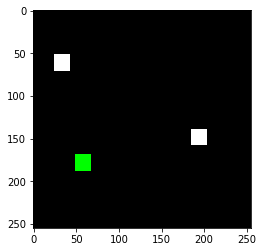

In [45]:
plt.imshow(broad_images[519].reshape(255, 255, 3))
plt.show();

In [53]:
def broad_greater_than_50_meters_port():
    """
    Return a numpy array of randomly generated images of a 
    power driven vessel that has two masthead lights and one running light
    visible.
    """
    white = (255, 255, 255)
    black = (0, 0, 0)
    red = (255, 0, 0)
    total_gens = np.random.randint(500, 701)
    all_broad_images = np.empty([total_gens, 195075], dtype=np.uint8)
    for i in range(total_gens):
        new_array = np.zeros((255, 255, 3))
        taller_masthead_light = np.random.randint(50, 126)
        shorter_masthead_light = np.random.randint(130, 186)
        distance_bw_left_endpoint = np.random.randint(20, 126)
        distance_bw_right_endpoint = np.random.randint(125, 211)
        running_light_diff = np.random.randint(10, 31)
        light_width = np.random.randint(10, 21)
        tall_masthead_height = taller_masthead_light + light_width
        tall_masthead_width = distance_bw_right_endpoint + light_width
        short_masthead_height = shorter_masthead_light + light_width
        short_masthead_width = distance_bw_left_endpoint + light_width
        running_light_start = shorter_masthead_light + running_light_diff
        running_light_width = running_light_start + light_width
        if distance_bw_right_endpoint - distance_bw_left_endpoint < 2 * light_width:
            running_light_loc = np.random.randint(distance_bw_right_endpoint - 20, distance_bw_right_endpoint + 21)
        else:
            running_light_loc = np.random.randint(distance_bw_left_endpoint, distance_bw_right_endpoint)
        running_light_area = running_light_loc + light_width
        new_array[taller_masthead_light:tall_masthead_height, distance_bw_right_endpoint:tall_masthead_width] = white
        new_array[shorter_masthead_light:short_masthead_height, distance_bw_left_endpoint:short_masthead_width] = white
        new_array[running_light_start:running_light_width, running_light_loc: running_light_area] = red
        new_array = new_array.flatten()
        all_broad_images[i] = new_array

    return all_broad_images

In [54]:
starboard_broad_images = broad_images
port_broad_images = broad_greater_than_50_meters_port()

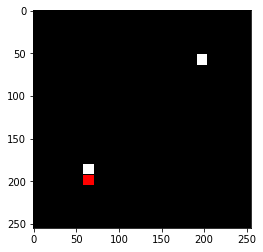

In [60]:
plt.imshow(port_broad_images[0].reshape(255, 255, 3))
plt.show();